# Non-invasive Phenotyping for Water and Nitrogen Uptake by Deep Roots Explored using Machine Learning


In [26]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# RadiMax Wheat 2018 and 2019

# Reading RLD data and isotope data of 2018 and 2019 experiments

In [214]:
import numpy as np
import pandas as pd

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/CLEAN_Wheat3_Full_experiment_root_length.csv")
data_June18_raw = pd.read_csv("./Data/CLEAN_Wheat4_Full_experiment_root_length.csv")
data_July18_raw = pd.read_csv("./Data/CLEAN_Wheat5_Full_experiment_root_length.csv")
isotope_data_18 = pd.read_excel("./Data/isotope_dataframe.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Breeders_15N.xlsx")

# Importing RadiMax modules for RLD data pre-processing
# Pre-Processing 2018 and 2019 RLD data

In [215]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),Square_root=True,imageArea=20,)


# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=True,imageArea=20,)

In [216]:
n = 10  # Number of intervals for computation of RL 2018
Soil_depth_range_18 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May18["soil_depth"].min(),
                data_June18["soil_depth"].min(),
                data_July18["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May18["soil_depth"].max(),
                data_June18["soil_depth"].max(),
                data_July18["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_18 = Soil_depth_range_18.astype(int)

In [217]:
Soil_depth_range_18

array([119, 129, 140, 150, 160, 170, 180, 190, 200, 210, 220])

In [218]:
n = 10  # Number of intervals for computation of RL 2019
Soil_depth_range_19 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May19["soil_depth"].min(),
                data_June19["soil_depth"].min(),
                data_July19["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May19["soil_depth"].max(),
                data_June19["soil_depth"].max(),
                data_July19["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_19 = Soil_depth_range_19.astype(int)

# Computation Root Lengths at Different Soil Layers in  2018

In [219]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Computation Root Lengths at Different Soil Layers in  2018
RL_May18, _ = fun_RL_computation(
    data_May18.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June18, _ = fun_RL_computation(
    data_June18.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July18, Intervals = fun_RL_computation(
    data_July18.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

# Figure 3: Average square root of planar root length density (Sqrt_pRLD) across all facility lines accumulated for 10 depth intervals between 119 and 220 cm in 2018 and 2019. The colors represent the three different imaging time-points. Error bars representing the standard deviation

In [220]:
import pandas as pd
import numpy as np
from numpy import std
import matplotlib.pyplot as plt

# 2018 

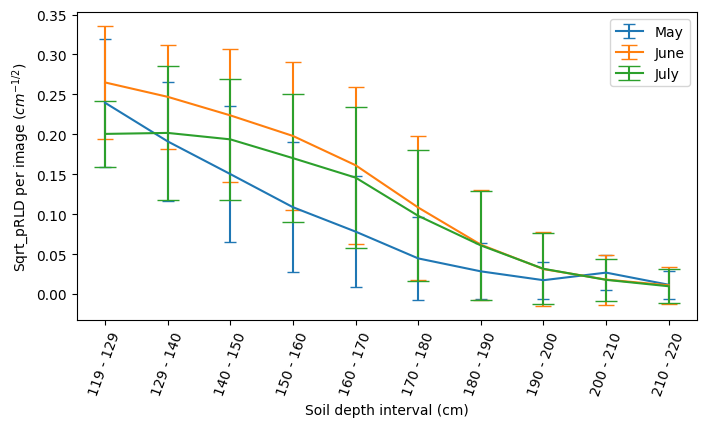

In [221]:
plot_RL(RL_May18, RL_June18, RL_July18, Intervals, n)  # Transformed data: Square root= True


In [222]:
# Computation Root Lengths in Different Soil Layers in 2019

RL_May19, _ = fun_RL_computation(
    data_May19.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June19, _ = fun_RL_computation(
    data_June19.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July19, Intervals = fun_RL_computation(
    data_July19.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

# 2019

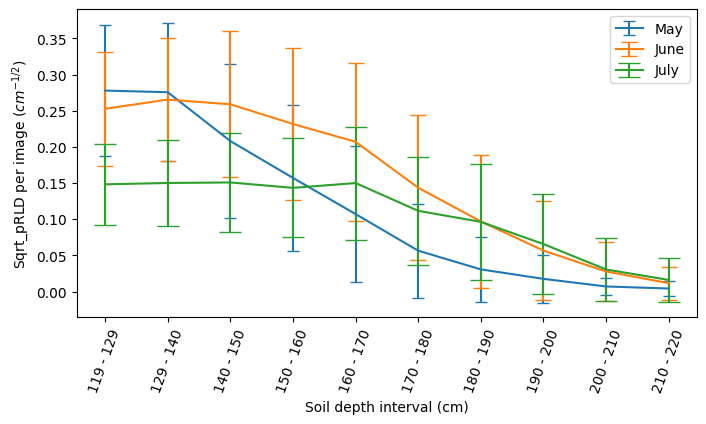

In [223]:
plot_RL(RL_May19, RL_June19, RL_July19, Intervals, n)  #  #  Transformed data: Square root= True

In [224]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_18 = RL_May18.merge(RL_June18, on="row").merge(RL_July18, on="row")

In [225]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_19 = RL_May19.merge(RL_June19, on="row").merge(RL_July19, on="row")

In [226]:
isotope_data_tube18 = isotope_data_preprocess(isotope_data_18.copy(), 2018)


In [227]:
isotope_data_tube19 = isotope_data_preprocess(isotope_data_19.copy(), 2019, side="Both")

In [228]:
# Merging the RLD with isotope data on tube side of Bed 1 and Bed 2
RL_Isotope_Interval_18 = pd.merge(RL_Interval_18, isotope_data_tube18, on="row")
RL_Isotope_Interval_18.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_18.dropna(inplace=True)
RL_Isotope_Interval_18.to_csv("./RL_Interval_data/df_18_Square_root.csv")

In [44]:
RL_Isotope_Interval_19 = pd.merge(RL_Interval_19, isotope_data_tube19, on="row")
RL_Isotope_Interval_19.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_19.dropna(inplace=True)
RL_Isotope_Interval_19.to_csv("./RL_Interval_data/df_19_Square_root.csv")

# Fig. 2 Square root of planar root length density (Sqrt_pRLD) in a single tube across soil depth in June 2018

In [235]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),Square_root=False,imageArea=20,)


# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=False,imageArea=20,)

In [236]:
#Droping missing Values [np.nan, np.inf, -np.inf]
import warnings
warnings.filterwarnings("ignore")

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data_May18_RL=data_May18.loc[:,['tube','Root_length','soil_depth']]
data_June18_RL=data_June18.loc[:,['tube','Root_length','soil_depth']]
data_July18_RL=data_July18.loc[:,['tube','Root_length','soil_depth']]
data_May18_RL=clean_dataset(data_May18_RL)
data_June18_RL=clean_dataset(data_June18_RL)
data_July18_RL=clean_dataset(data_July18_RL)

In [237]:
import scipy
from scipy import interpolate
import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os
def sigmoid(x, x0,b,L,c):
    return L*(scipy.special.expit((x-x0)*b,dtype = np.float128))+c  #expit(x) = 1/(1+exp(-b*(x-x0)))+c.

def sigmoid0(x, x0,b,L):
    return L*(scipy.special.expit((x-x0)*b,dtype = np.float128))  #expit(x) = 1/(1+exp(-b*(x-x0))).
    # Ensure that the sigmoid tends to infinity in the limit (because the "c" from above is now gone)

In [238]:
def FitSigmoid(i,x, y, zeroInfinity=True, soilMinDepth=0, soilMaxDepth=250, visual=True):
    initPars = [0.33, -50, 2, .01] # inflection, b_sig, L, c
    if zeroInfinity:
        bounds = [[0, -np.inf, 0], [1, 0, np.inf]]  # inflection, b, L
        args, cov = curve_fit(sigmoid0, x, y, p0=initPars[:-1], maxfev=1e05,ftol=1e-07, xtol=1e-07, gtol=.0001, bounds=bounds) 
        x0_sig_inflec,b_sig,L = args
        c = 0
        y_pred = sigmoid0(x, *args)
        y0_SI = sigmoid0(x0_sig_inflec, *args)
    else:
        args, cov = curve_fit(sigmoid, x, y, p0=initPars,maxfev=1000000,ftol=1e-08, xtol=1e-08,gtol=.00001) 
        x0_sig_inflec,b_sig,L,c = args    
        y_pred = sigmoid(x, *args)
        y0_SI = sigmoid(x0_sig_inflec, *args)
        
    #print('Fitted sigmoid, max L %.1f, infl %.2f, slope b %.1f, c %.1f' % (L,x0_sig_inflec,b_sig,c))

    # Estimated parameters #expit(x) = 1/(1+exp(-b*(x-x0))) : def sigmoid(x, x0,b,L,c):.
    SR2 = r2_score(y, y_pred)
    print(SR2)

    # Original soil depth scale 
    soilDepthRange = soilMaxDepth - soilMinDepth
    x0_sig_inflec_actual = round(x0_sig_inflec*soilDepthRange + soilMinDepth, 5)
    s = str(x0_sig_inflec_actual)+" cm"

    if visual:
        # Original soil depth
        xp_lav = round(x*soilDepthRange + soilMinDepth,2)   

        fig, ax = plt.subplots(figsize=(6, 3))
        ax.plot(xp_lav, y, 'o', xp_lav, y_pred,'-')
        ax.set_prop_cycle(color=['green', 'blue'])

        ax.annotate('Inflection: '+s, xy=(x0_sig_inflec_actual, y0_SI), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2-.2),
                     arrowprops=dict(facecolor='black', shrink=0.05))

        ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='orange')
        plt.title('August 2020 : row no. '+ str(np.array(i).astype(int)))
        ax.legend(['Sqrt_pRLD',r'Sigmoid: $R^{2}=$'+str(np.round(SR2,2))])

        ax.set_xlabel('Soil depth [cm]')
        ax.set_ylabel('Sqrt_pRLD per image (sqrt($cm^{-1}$))')

    return args, cov ,SR2

Tube No: 2
0.8482081103334457


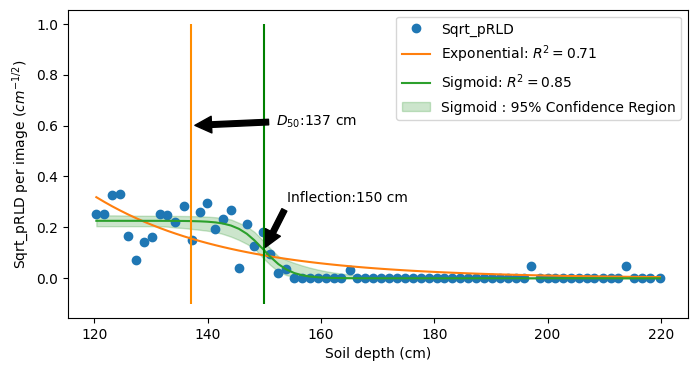

Estimated parameters:
a: 150 +/- 0.008946429279034676
b: -41.9617630872797 +/- 13.632298497283887
c: 0.2256753905553889 +/- 0.010652144291304068
tau: 0.2256753905553889 +/- 0.8930494481412418


In [248]:
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

from RadiMaxRootDepth import func_exp,sigmoid,sigmoid_initial_Infle_point,count_consecutive

# Specify month for display results of curve fitting 
data=data_June18_RL.copy()
data.tube=data.tube.astype(int)
for i in [2]:    
    temp1 = data[data.tube==i].sort_values(by='soil_depth')
    x=temp1['soil_depth']
    y=temp1['Root_length']
    x = (x- x.values[0])/(x.values[-1] - x.values[0])   # normalize    
    print(f'Tube No: {i}')

    popt, pcov =curve_fit(func_exp, x, np.sqrt(y),p0=[1,0.1,.11] ,bounds=(0, (np.inf, np.inf, np.inf)),method='trf')
    a, tau,c= popt
    a_unc, tau_unc, c_unc = np.sqrt(np.diag(pcov))
    y_fit = func_exp(x, a, tau,c)
    y_pred = func_exp(x, *popt)
    SR1= r2_score(np.sqrt(y), y_pred)
 
    #Half-life of Exponentail Decay function 
    xph=np.log(2)/(tau)    
    #fig, axs = plt.subplots(1, 2)
    fig, ax = plt.subplots(figsize=(8, 4))
    xp_actual=int(round(xph*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
    #half_life=np.append(half_life,xp_actual)
   # a_exp_avg=np.append(a_exp_avg,a)
   # tau_exp_avg=np.append(tau_exp_avg,tau)
    a=round(a,2)
    tau=round(tau,2)
    ss=str(np.round(xp_actual,1))+" cm"
    xp_lav=round(x*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)   
    #xi=sigmoid_initial_Infle_point(x,y) 
    
    #args, cov =curve_fit(sigmoid, x, y,p0=[0.52,5,2,.01],maxfev=10000000,ftol=1e-08, xtol=1e-08,gtol=0.00001) 
    
    args, cov,SR2=FitSigmoid(i,x, np.sqrt(y), zeroInfinity=True, soilMinDepth=temp1['soil_depth'].values[0], soilMaxDepth=temp1['soil_depth'].values[-1],visual=False)

    x0_sig_inflec,b_sig,L=args    
    x0_sig_inflec_unc, b_unc, L_unc = np.sqrt(np.diag(cov))

    y_pred = sigmoid0(x, *args)
    #SR2=r2_score(y, y_pred)
    

    x0_sig_inflec_actual=int(round(x0_sig_inflec*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
    num_samples = 100
    samples = np.random.multivariate_normal([x0_sig_inflec,b_sig,L], cov, num_samples)
    y_samples = np.zeros((num_samples, len(xp_lav)))
    for i, sample in enumerate(samples):
        y_samples[i] = sigmoid0(x,*sample)

# Plot the original data, the fitted curve, and the confidence region


    s=str(x0_sig_inflec_actual)+" cm"
    ax.plot(xp_lav, np.sqrt(y), 'o',xp_lav, y_fit, xp_lav, sigmoid0(x, *args),'-')
    plt.fill_between(xp_lav, np.percentile(y_samples, 2.5, axis=0),
                 np.percentile(y_samples, 97.5, axis=0), color='green', alpha=0.2)
    ax.set_prop_cycle(color=['red', 'green', 'blue'])
    
    ax.vlines(x=xp_actual, ymin=-0.1, ymax=int(y.max()+1),color='darkorange')
    ax.annotate(r'$D_{50}$:'+ss, xy=(xp_actual, 0.6), xytext=(x0_sig_inflec_actual+2, 0.6),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.annotate('Inflection:'+s, xy=(x0_sig_inflec_actual, sigmoid0(x0_sig_inflec,x0_sig_inflec,b_sig,L)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2-.2),
                arrowprops=dict(facecolor='black', shrink=0.05))
   #ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='red')
    ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='green')
    
    
    ax.legend(['Sqrt_pRLD',r'Exponential: $R^{2}=$'+str(np.round(SR1,2)),r'Sigmoid: $R^{2}=$'+str(np.round(SR2,2)),'Sigmoid : 95% Confidence Region'])
  #  plt.title('June 2018: Tube No. '+ str(i))
    ax.set_xlabel('Soil depth (cm)')
    ax.set_ylabel('Sqrt_pRLD per image ($cm^{-1/2}$)')
    plt.show()
    # Print the estimated parameters and their uncertainties
    print('Estimated parameters:')
    print('a:', x0_sig_inflec_actual, '+/-', x0_sig_inflec_unc)
    print('b:', b_sig, '+/-', b_unc)
    print('c:', L, '+/-', L_unc)
    print('tau:', L, '+/-', tau_unc)



In [240]:
xph=np.log(2)/(tau-0.893)   
xp_actual = int(round(xph*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
xp_actual

141

In [241]:
# Uncertainty in D50
np.std([134,137,141])

2.8674417556808756

# For Figure 1

# Facility Position Correction


In [26]:
import pandas as pd

RL_Isotope_Interval_18 = pd.read_csv(
    "./RL_Interval_data/df_18_Square_root.csv", index_col="Unnamed: 0"
)
df = RL_Isotope_Interval_18
dfb1 = df[df.bed == 1]  # Bed 1

Text(0, 0.5, 'log$\\delta15N$')

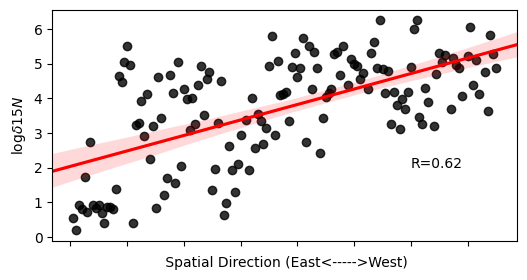

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    1220,
    2,
    "R=" + str(round(r_value, 2)),
    horizontalalignment="left",
    size="medium",
    color="black",
)

handel = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
handel.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"log$\delta15N$")

# Spatial  Correction for enire dataframe RL_Isotope_Interval_18

In [200]:
from RadiMaxML import SpatialCorrection

DF_18_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_18.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [43]:
# Save
DF_18_Raw_spatial_corrected_L.to_csv("DF_18_Raw_spatial_corrected_L.csv")

In [44]:
# Read again for future use
DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

# Table 2 
# Modelling on 2018 Dataset
# Random Forest using five fold cross-validation

In [2]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)



RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500,1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r, Fim_raw, pval, ML_df_TestRMSE= ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Log_Delta_15N RF
Original correlation coefficient: 0.45937923751705656
Standard deviation of correlation: 0.042437388558044783
95% Confidence interval of correlation: [0.37513441 0.53848689]
Bias 0.00
Var_pred 0.36
Full test r 0.46
 
Delta_13C RF
Original correlation coefficient: 0.42365891622988594
Standard deviation of correlation: 0.045749734109770034
95% Confidence interval of correlation: [0.32719866 0.51476341]
Bias 0.01
Var_pred 0.07
Full test r 0.42


# Modelling on 2018 Dataset

# GB using five fold cross-validation

In [ ]:

from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)



RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r_GB, Fim_raw_GB, pval, ML_df_TestRMSE_GB= ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "GB")
               

# Fig. 6 Random Forest feature importance for 15N uptake (left) and, 13C discrimination (right) in 2018. The feature importance of May, June, and July are plotted against at 10 different soil depth intervals between 119 - 220 cm to visualize the important depths for 15N uptake and 13C discrimination, respectively


In [17]:
col = DF_18_Raw_spatial_corrected_L.iloc[:, 0:-5].columns
col

Index(['RL_May_SD_(119, 129]', 'RL_May_SD_(129, 140]', 'RL_May_SD_(140, 150]',
       'RL_May_SD_(150, 160]', 'RL_May_SD_(160, 170]', 'RL_May_SD_(170, 180]',
       'RL_May_SD_(180, 190]', 'RL_May_SD_(190, 200]', 'RL_May_SD_(200, 210]',
       'RL_May_SD_(210, 220]', 'RL_June_SD_(119, 129]',
       'RL_June_SD_(129, 140]', 'RL_June_SD_(140, 150]',
       'RL_June_SD_(150, 160]', 'RL_June_SD_(160, 170]',
       'RL_June_SD_(170, 180]', 'RL_June_SD_(180, 190]',
       'RL_June_SD_(190, 200]', 'RL_June_SD_(200, 210]',
       'RL_June_SD_(210, 220]', 'RL_July_SD_(119, 129]',
       'RL_July_SD_(129, 140]', 'RL_July_SD_(140, 150]',
       'RL_July_SD_(150, 160]', 'RL_July_SD_(160, 170]',
       'RL_July_SD_(170, 180]', 'RL_July_SD_(180, 190]',
       'RL_July_SD_(190, 200]', 'RL_July_SD_(200, 210]',
       'RL_July_SD_(210, 220]'],
      dtype='object')

# Fig 6 Feature Importance of Root Distributions for predicting Isotope measurements

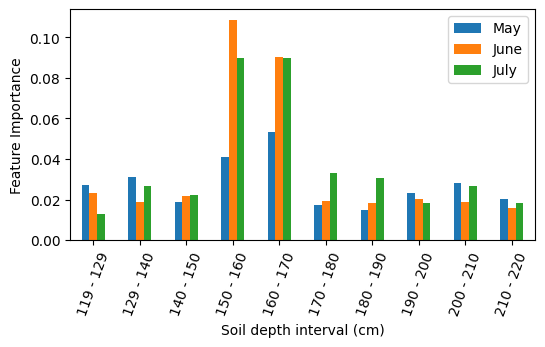

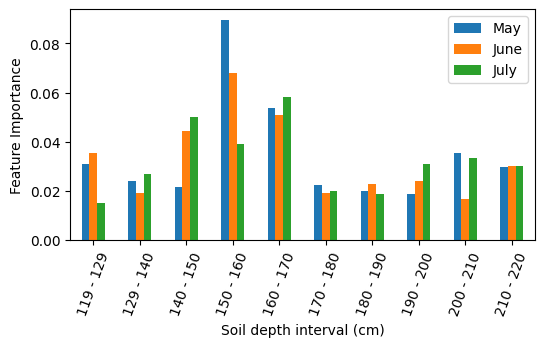

In [22]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i ]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    
    Intervals=[str(119)+str(' - ')+str(129), str(129)+str(' - ')+str(140), str(140)+str(' - ')+str(150), str(150)+str(' - ')+str(160), str(160)+str(' - ')+str(170),
                  str(170)+str(' - ')+str(180), str(180)+str(' - ')+str(190), str(190)+str(' - ')+str(200), str(200)+str(' - ')+str(210), str(210)+str(' - ')+str(220)]
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    plt.xlabel('Soil depth interval (cm)')
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")

# Modelling on 2019 Dataset

In [46]:
from RadiMaxML import SpatialCorrection


DF_19_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_19.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [47]:
DF_19_Raw_spatial_corrected_L

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N,bed,x
0,-0.105407,0.014508,0.072298,-0.089542,0.088982,0.047083,0.009142,0.003155,-0.001394,0.009434,...,0.104006,0.029183,0.022719,-0.007500,-0.000705,-0.056695,0.317102,0.133997,1,1132
1,-0.052435,-0.006519,-0.147426,0.116770,0.046194,-0.030487,0.033866,0.002722,-0.001481,-0.001871,...,0.098153,-0.013907,-0.012331,0.000902,-0.000901,-7.834298,0.835982,-1.350252,1,1133
2,0.087635,-0.031740,0.019170,0.022739,-0.000126,0.063063,-0.007167,0.002289,0.009621,-0.001909,...,-0.018636,0.012541,0.009664,-0.008332,-0.001098,-2.895779,-0.023752,-0.156092,1,1134
3,0.085295,0.090743,0.096175,0.083074,-0.041696,-0.032042,-0.009669,0.001857,0.003311,-0.001946,...,0.052625,-0.023040,-0.019068,-0.008748,-0.001295,-7.313328,-0.108411,-0.976382,1,1135
4,0.035151,0.011645,0.055042,0.042922,-0.023569,-0.032820,0.035102,0.007583,-0.001741,0.004277,...,-0.047961,-0.022551,0.014483,-0.006409,0.004288,-8.401587,0.342764,-1.265185,1,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.009861,0.039730,-0.120441,-0.248936,-0.153646,-0.070182,-0.029546,-0.030806,-0.013238,-0.011030,...,-0.103063,-0.113927,-0.069114,-0.060988,-0.047466,-18.341332,-0.364768,-0.287448,2,2215
207,-0.034318,-0.070018,0.007254,-0.195170,-0.053120,-0.070390,-0.062745,-0.030996,-0.010947,-0.008055,...,-0.117314,-0.138292,-0.091907,-0.047303,-0.040866,-29.328391,0.070289,-0.753097,2,2216
208,0.183645,0.034939,-0.011616,0.072181,0.045831,0.002436,-0.019804,-0.024301,-0.013427,-0.011239,...,0.070957,0.039461,0.064529,0.055434,-0.012903,15.803515,0.019189,0.482394,2,2217
209,-0.012773,-0.067786,-0.001535,-0.068284,-0.108616,-0.068859,-0.063865,-0.031378,-0.010148,-0.011344,...,-0.097494,-0.089846,-0.085632,-0.062269,-0.010213,-24.180334,-0.801281,-0.501783,2,2218


#  2019 Dataset:   Random Forest using nested cross-validation
# Table 2  
# Gradient Boosting using five fold cross-validation

In [51]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)



RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500,1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r, Fim_raw, pval, ML_df_TestRMSE= ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Log_Delta_15N RF
Original correlation coefficient: 0.09975737624501023
Standard deviation of correlation: 0.06812099802000972
95% Confidence interval of correlation: [-0.02837628  0.2315878 ]
Bias -0.03
Var_pred 0.05
Full test r 0.10
 
Delta_13C RF
Original correlation coefficient: 0.08232848751810218
Standard deviation of correlation: 0.06896914221392388
95% Confidence interval of correlation: [-0.04716029  0.21676799]
Bias 0.01
Var_pred 0.01
Full test r 0.08


In [52]:
pval

,RF
Log_Delta_15N,0.148723
Delta_13C,0.233729


In [53]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)



RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200,300,500,1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]


LDF_Raw_Full_test_r_GB, Fim_raw_GB, pval_GB, ML_df_TestRMSE_GB= ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "GB"
)

 
Log_Delta_15N GB
Original correlation coefficient: 0.007301792154968623
Standard deviation of correlation: 0.06905720136037143
95% Confidence interval of correlation: [-0.12400903  0.14503137]
Bias -0.04
Var_pred 0.14
Full test r 0.01
 
Delta_13C GB
Original correlation coefficient: 0.09514018086747993
Standard deviation of correlation: 0.06813160879496205
95% Confidence interval of correlation: [-0.03572085  0.22017319]
Bias 0.00
Var_pred 0.02
Full test r 0.10


In [54]:
pval_GB

,GB
Log_Delta_15N,0.916030
Delta_13C,0.168541


# Rooting depth correlation: Table 2

In [117]:
# Read the Rooting depth data of all selected tubes 
SI_18_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')
SI_19_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')

In [58]:
SI_18_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)
from RadiMaxML import SpatialCorrection

SI_18_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_18_Raw_spatial_corrected_L.copy(), "L"
)  


 Linear correction: Done


In [59]:
SI_18_Raw_spatial_corrected_Done

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,Delta_15N,Delta_13C,Log_Delta_15N,bed,x
0,-1.372617,-4.190042,-3.118051,0.743876,-4.235910,-2.583263,-3.042260,-2.553148,-7.875498,1.102414,-1.361406,0.626231,-12.740495,0.718779,-1.920374,1,1102
1,0.185110,-1.721430,-1.039038,3.355339,-5.062560,-1.546611,-2.688424,-4.724464,-7.943607,-2.693216,-5.536749,-5.008988,-12.470171,1.167138,-1.210699,1,1103
2,-1.339608,-4.922818,-5.010026,-1.523197,1.347944,-2.719960,-2.764587,0.704219,-6.929346,3.351154,0.177908,0.855793,-13.812765,0.201387,-1.360061,1,1104
3,4.722353,14.745794,12.248987,12.848266,12.836363,5.556692,3.279249,6.032902,6.355546,6.185524,5.522565,13.530574,-11.370930,-0.420292,-0.439322,1,1105
4,4.933076,-3.935594,-4.702000,1.369729,-7.626254,-4.656657,-6.806915,-7.568414,-9.147502,0.799894,-1.342778,-2.074645,-16.056541,1.559494,-1.480097,1,1106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-20.504187,-15.579784,-15.768761,-21.458880,-14.568186,-17.434722,-14.857803,-18.721906,-14.625119,-15.476720,-14.826211,-22.329765,-0.341924,0.233198,0.380347,2,2242
269,-10.092801,-14.396812,-10.076391,-8.495487,-11.233655,-9.280489,-7.213116,-6.210655,-5.336653,-11.039236,-8.639963,-1.876862,230.202286,1.066458,1.142084,2,2243
270,7.343990,-1.823840,1.095979,11.507906,1.646223,-10.146255,-4.268429,0.130596,3.797472,0.718248,1.546284,4.716040,7.953497,-1.242516,0.405870,2,2244
271,-14.102118,-1.227895,0.770720,3.944692,-4.122793,-3.417789,-1.539056,-2.346901,-1.639275,-10.476785,-8.791220,-6.458154,-166.793633,-0.642389,-1.391429,2,2246


In [60]:
SI_18_Raw_spatial_corrected_Done_ML=SI_18_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Log_Delta_15N','Delta_13C']]

# Table 2:   correlation and uncertainty analysis

In [104]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

def compute_correlation_matrix(data, num_iterations=1000):
    num_columns = len(data.columns)
    corr_matrix = data.corr()
    bootstrap_corrs = np.zeros((num_columns, num_columns, num_iterations))

    for i in range(num_iterations):
        bootstrap_sample = data.sample(n=len(data), replace=True)
        bootstrap_corr_matrix = bootstrap_sample.corr().values
        bootstrap_corrs[:, :, i] = bootstrap_corr_matrix

    std_devs = np.std(bootstrap_corrs, axis=2)
    confidence_intervals = np.percentile(bootstrap_corrs, [2.5, 97.5], axis=2)

    return corr_matrix, std_devs, confidence_intervals
# Assuming you have a pandas DataFrame named df with multiple columns

In [134]:

df=SI_18_Raw_spatial_corrected_Done_ML
data = df  # Replace with your actual DataFrame

corr_matrix, std_devs, confidence_intervals = compute_correlation_matrix(data)

# Convert correlation matrix, std_devs, and confidence_intervals to DataFrames
corr_matrix_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
std_devs_df = pd.DataFrame(std_devs, columns=data.columns, index=data.columns)

confidence_intervals_df = pd.DataFrame(index=data.columns, columns=data.columns)
for col in data.columns:
    lower_ci = confidence_intervals[0, :, data.columns.get_loc(col)].round(2)
    upper_ci = confidence_intervals[1, :, data.columns.get_loc(col)].round(2)
    confidence_intervals_df[col] = [f'({a}, {b})' for a, b in zip(lower_ci, upper_ci)]


In [135]:
std_devs_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,0.00,0.05,0.05,0.03,0.03,0.04,0.05,0.06
June_half_life,0.05,0.00,0.04,0.04,0.03,0.04,0.05,0.05
July_half_life,0.05,0.04,0.00,0.05,0.03,0.03,0.04,0.05
May_Inflection_sig_point,0.03,0.04,0.05,0.00,0.03,0.03,0.05,0.05
June_Inflection_sig_point,0.03,0.03,0.03,0.03,0.00,0.01,0.05,0.05
July_Inflection_sig_point,0.04,0.04,0.03,0.03,0.01,0.00,0.05,0.04
Log_Delta_15N,0.05,0.05,0.04,0.05,0.05,0.05,0.00,0.06
Delta_13C,0.06,0.05,0.05,0.05,0.05,0.04,0.06,0.00


In [136]:
corr_matrix_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.00,0.48,0.44,0.79,0.59,0.59,0.26,-0.17
June_half_life,0.48,1.00,0.73,0.57,0.76,0.68,0.32,-0.21
July_half_life,0.44,0.73,1.00,0.49,0.69,0.70,0.31,-0.19
May_Inflection_sig_point,0.79,0.57,0.49,1.00,0.73,0.73,0.34,-0.27
June_Inflection_sig_point,0.59,0.76,0.69,0.73,1.00,0.91,0.37,-0.30
July_Inflection_sig_point,0.59,0.68,0.70,0.73,0.91,1.00,0.39,-0.31
Log_Delta_15N,0.26,0.32,0.31,0.34,0.37,0.39,1.00,-0.32
Delta_13C,-0.17,-0.21,-0.19,-0.27,-0.30,-0.31,-0.32,1.00


In [138]:
confidence_intervals_df

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,"(1.0, 1.0)","(0.38, 0.59)","(0.34, 0.53)","(0.74, 0.84)","(0.53, 0.65)","(0.52, 0.66)","(0.16, 0.37)","(-0.29, -0.05)"
June_half_life,"(0.38, 0.59)","(1.0, 1.0)","(0.66, 0.81)","(0.49, 0.66)","(0.7, 0.82)","(0.61, 0.76)","(0.23, 0.41)","(-0.3, -0.13)"
July_half_life,"(0.34, 0.53)","(0.66, 0.81)","(1.0, 1.0)","(0.39, 0.59)","(0.63, 0.75)","(0.63, 0.76)","(0.23, 0.39)","(-0.28, -0.09)"
May_Inflection_sig_point,"(0.74, 0.84)","(0.49, 0.66)","(0.39, 0.59)","(1.0, 1.0)","(0.67, 0.78)","(0.67, 0.78)","(0.23, 0.44)","(-0.37, -0.17)"
June_Inflection_sig_point,"(0.53, 0.65)","(0.7, 0.82)","(0.63, 0.75)","(0.67, 0.78)","(1.0, 1.0)","(0.89, 0.94)","(0.26, 0.47)","(-0.4, -0.2)"
July_Inflection_sig_point,"(0.52, 0.66)","(0.61, 0.76)","(0.63, 0.76)","(0.67, 0.78)","(0.89, 0.94)","(1.0, 1.0)","(0.29, 0.49)","(-0.41, -0.23)"
Log_Delta_15N,"(0.16, 0.37)","(0.23, 0.41)","(0.23, 0.39)","(0.23, 0.44)","(0.26, 0.47)","(0.29, 0.49)","(1.0, 1.0)","(-0.43, -0.2)"
Delta_13C,"(-0.29, -0.05)","(-0.3, -0.13)","(-0.28, -0.09)","(-0.37, -0.17)","(-0.4, -0.2)","(-0.41, -0.23)","(-0.43, -0.2)","(1.0, 1.0)"


In [72]:
import matplotlib.pyplot as plt

In [112]:
from scipy.stats import pearsonr
import numpy as np
rho = SI_18_Raw_spatial_corrected_Done_ML.corr()
pval = SI_18_Raw_spatial_corrected_Done_ML.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) +' ± '+std_devs_df.round(2).astype(str) +p

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.0 ± 0.0***,0.48 ± 0.06***,0.44 ± 0.05***,0.79 ± 0.03***,0.59 ± 0.04***,0.59 ± 0.04***,0.26 ± 0.05***,-0.17 ± 0.06**
June_half_life,0.48 ± 0.06***,1.0 ± 0.0***,0.73 ± 0.04***,0.57 ± 0.04***,0.76 ± 0.03***,0.68 ± 0.04***,0.32 ± 0.05***,-0.21 ± 0.04***
July_half_life,0.44 ± 0.05***,0.73 ± 0.04***,1.0 ± 0.0***,0.49 ± 0.05***,0.69 ± 0.03***,0.7 ± 0.04***,0.31 ± 0.04***,-0.19 ± 0.05**
May_Inflection_sig_point,0.79 ± 0.03***,0.57 ± 0.04***,0.49 ± 0.05***,1.0 ± 0.0***,0.73 ± 0.03***,0.73 ± 0.03***,0.34 ± 0.05***,-0.27 ± 0.05***
June_Inflection_sig_point,0.59 ± 0.04***,0.76 ± 0.03***,0.69 ± 0.03***,0.73 ± 0.03***,1.0 ± 0.0***,0.91 ± 0.01***,0.37 ± 0.05***,-0.3 ± 0.05***
July_Inflection_sig_point,0.59 ± 0.04***,0.68 ± 0.04***,0.7 ± 0.04***,0.73 ± 0.03***,0.91 ± 0.01***,1.0 ± 0.0***,0.39 ± 0.05***,-0.31 ± 0.04***
Log_Delta_15N,0.26 ± 0.05***,0.32 ± 0.05***,0.31 ± 0.04***,0.34 ± 0.05***,0.37 ± 0.05***,0.39 ± 0.05***,1.0 ± 0.0***,-0.32 ± 0.06***
Delta_13C,-0.17 ± 0.06**,-0.21 ± 0.04***,-0.19 ± 0.05**,-0.27 ± 0.05***,-0.3 ± 0.05***,-0.31 ± 0.04***,-0.32 ± 0.06***,1.0 ± 0.0***


# 2019

In [118]:
SI_19_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)
from RadiMaxML import SpatialCorrection

SI_19_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_19_Raw_spatial_corrected_L.copy(), "L"
)  


 Linear correction: Done


In [124]:
SI_19_Raw_spatial_corrected_Done_ML=SI_19_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Log_Delta_15N','Delta_13C']]

In [140]:

df=SI_19_Raw_spatial_corrected_Done_ML
data = df  # Replace with your actual DataFrame

corr_matrix, std_devs, confidence_intervals = compute_correlation_matrix(data)

# Convert correlation matrix, std_devs, and confidence_intervals to DataFrames
corr_matrix_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
std_devs_df = pd.DataFrame(std_devs, columns=data.columns, index=data.columns)

confidence_intervals_df = pd.DataFrame(index=data.columns, columns=data.columns)
for col in data.columns:
    lower_ci = confidence_intervals[0, :, data.columns.get_loc(col)].round(2)
    upper_ci = confidence_intervals[1, :, data.columns.get_loc(col)].round(2)
    confidence_intervals_df[col] = [f'({a}, {b})' for a, b in zip(lower_ci, upper_ci)]



In [141]:
corr_matrix_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.00,0.58,0.50,0.69,0.39,0.42,0.17,-0.01
June_half_life,0.58,1.00,0.59,0.41,0.64,0.44,0.17,0.13
July_half_life,0.50,0.59,1.00,0.38,0.46,0.55,0.18,0.08
May_Inflection_sig_point,0.69,0.41,0.38,1.00,0.54,0.49,0.15,-0.02
June_Inflection_sig_point,0.39,0.64,0.46,0.54,1.00,0.71,0.17,0.06
July_Inflection_sig_point,0.42,0.44,0.55,0.49,0.71,1.00,0.24,0.12
Log_Delta_15N,0.17,0.17,0.18,0.15,0.17,0.24,1.00,0.01
Delta_13C,-0.01,0.13,0.08,-0.02,0.06,0.12,0.01,1.00


In [142]:
std_devs_df.round(2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,0.00,0.05,0.05,0.04,0.06,0.06,0.07,0.07
June_half_life,0.05,0.00,0.05,0.05,0.05,0.05,0.08,0.06
July_half_life,0.05,0.05,0.00,0.06,0.06,0.06,0.07,0.06
May_Inflection_sig_point,0.04,0.05,0.06,0.00,0.04,0.05,0.07,0.07
June_Inflection_sig_point,0.06,0.05,0.06,0.04,0.00,0.05,0.07,0.07
July_Inflection_sig_point,0.06,0.05,0.06,0.05,0.05,0.00,0.07,0.07
Log_Delta_15N,0.07,0.08,0.07,0.07,0.07,0.07,0.00,0.08
Delta_13C,0.07,0.06,0.06,0.07,0.07,0.07,0.08,0.00


In [143]:
confidence_intervals_df

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,"(1.0, 1.0)","(0.47, 0.68)","(0.39, 0.59)","(0.61, 0.77)","(0.28, 0.5)","(0.29, 0.53)","(0.03, 0.29)","(-0.15, 0.14)"
June_half_life,"(0.47, 0.68)","(1.0, 1.0)","(0.49, 0.69)","(0.3, 0.51)","(0.53, 0.72)","(0.34, 0.54)","(-0.01, 0.31)","(0.01, 0.24)"
July_half_life,"(0.39, 0.59)","(0.49, 0.69)","(1.0, 1.0)","(0.26, 0.49)","(0.34, 0.58)","(0.43, 0.65)","(0.04, 0.32)","(-0.05, 0.2)"
May_Inflection_sig_point,"(0.61, 0.77)","(0.3, 0.51)","(0.26, 0.49)","(1.0, 1.0)","(0.45, 0.62)","(0.37, 0.58)","(0.02, 0.27)","(-0.17, 0.12)"
June_Inflection_sig_point,"(0.28, 0.5)","(0.53, 0.72)","(0.34, 0.58)","(0.45, 0.62)","(1.0, 1.0)","(0.61, 0.81)","(0.03, 0.31)","(-0.09, 0.19)"
July_Inflection_sig_point,"(0.29, 0.53)","(0.34, 0.54)","(0.43, 0.65)","(0.37, 0.58)","(0.61, 0.81)","(1.0, 1.0)","(0.11, 0.36)","(-0.02, 0.24)"
Log_Delta_15N,"(0.03, 0.29)","(-0.01, 0.31)","(0.04, 0.32)","(0.02, 0.27)","(0.03, 0.31)","(0.11, 0.36)","(1.0, 1.0)","(-0.14, 0.15)"
Delta_13C,"(-0.15, 0.14)","(0.01, 0.24)","(-0.05, 0.2)","(-0.17, 0.12)","(-0.09, 0.19)","(-0.02, 0.24)","(-0.14, 0.15)","(1.0, 1.0)"


In [145]:
from scipy.stats import pearsonr
import numpy as np
rho = SI_19_Raw_spatial_corrected_Done_ML.corr()
pval = SI_19_Raw_spatial_corrected_Done_ML.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) +' ± '+std_devs_df.round(2).astype(str) +p

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Log_Delta_15N,Delta_13C
May_half_life,1.0 ± 0.0***,0.58 ± 0.05***,0.5 ± 0.05***,0.69 ± 0.04***,0.39 ± 0.06***,0.42 ± 0.06***,0.17 ± 0.07*,-0.01 ± 0.07
June_half_life,0.58 ± 0.05***,1.0 ± 0.0***,0.59 ± 0.05***,0.41 ± 0.05***,0.64 ± 0.05***,0.44 ± 0.05***,0.17 ± 0.08*,0.13 ± 0.06
July_half_life,0.5 ± 0.05***,0.59 ± 0.05***,1.0 ± 0.0***,0.38 ± 0.06***,0.46 ± 0.06***,0.55 ± 0.06***,0.18 ± 0.07**,0.08 ± 0.06
May_Inflection_sig_point,0.69 ± 0.04***,0.41 ± 0.05***,0.38 ± 0.06***,1.0 ± 0.0***,0.54 ± 0.04***,0.49 ± 0.05***,0.15 ± 0.07*,-0.02 ± 0.07
June_Inflection_sig_point,0.39 ± 0.06***,0.64 ± 0.05***,0.46 ± 0.06***,0.54 ± 0.04***,1.0 ± 0.0***,0.71 ± 0.05***,0.17 ± 0.07*,0.06 ± 0.07
July_Inflection_sig_point,0.42 ± 0.06***,0.44 ± 0.05***,0.55 ± 0.06***,0.49 ± 0.05***,0.71 ± 0.05***,1.0 ± 0.0***,0.24 ± 0.07***,0.12 ± 0.07
Log_Delta_15N,0.17 ± 0.07*,0.17 ± 0.08*,0.18 ± 0.07**,0.15 ± 0.07*,0.17 ± 0.07*,0.24 ± 0.07***,1.0 ± 0.0***,0.01 ± 0.08
Delta_13C,-0.01 ± 0.07,0.13 ± 0.06,0.08 ± 0.06,-0.02 ± 0.07,0.06 ± 0.07,0.12 ± 0.07,0.01 ± 0.08,1.0 ± 0.0***


# Fig. 5 Deep root functioning analysis using root depth estimated by SI

In [178]:
import pandas as pd
import numpy as np
#2018
DF_SR=pd.read_csv('Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')


In [179]:
DF_SR1=DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','x','bed','Delta_15N','Delta_13C','Log_Delta_15N']]

In [180]:
from RadiMaxML import SpatialCorrection 
from RadiMaxML import ML_NCV
DF_SQ_spatial_corrected_L=SpatialCorrection(DF_SR1.copy(),'L')# L for Linear


 Linear correction: Done


In [181]:
DF_SR['Log_Delta_15N']=DF_SQ_spatial_corrected_L['Log_Delta_15N']

In [182]:
DF_SR['Delta_13C']=DF_SQ_spatial_corrected_L['Delta_13C']

In [183]:
#DF_SR=SI_18_Raw_spatial_corrected_Done_ML.copy()

0.027160451225424063 -4.650762659506904 0.3082590087440933 2.0251861664546467e-07


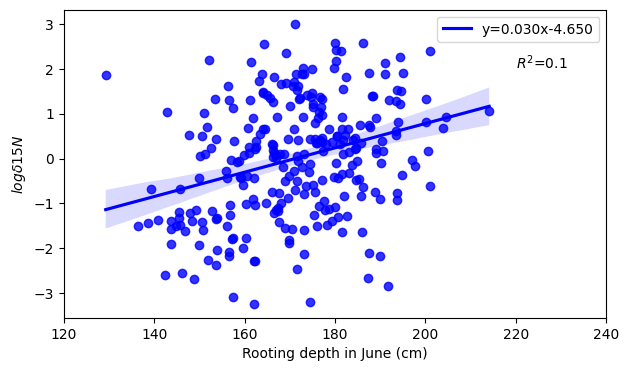

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$log \delta 15N$')
plt.text(220, 2.0, "$R^2$="+str(round(r_value**2,2)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.xlim((120, 240))
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [186]:
import seaborn as sns
import statsmodels.api as sm
#coeffs, _ = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR).get_lines()[0].get_data()

# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Log_Delta_15N"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Delta_15N   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     28.46
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           2.03e-07
Time:                        17:30:32   Log-Likelihood:                -446.82
No. Observations:                 273   AIC:                             897.6
Df Residuals:                     271   BIC:                             904.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

-0.010824611882805446 1.8535296166612292 -0.2562431055839135 1.817704684227331e-05


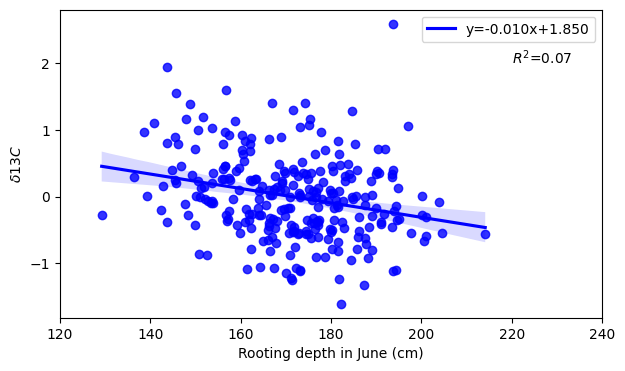

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x+{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')
plt.text(220, 2.0, "$R^2$="+str(round(r_value**2,2)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.xlim((120, 240))
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [188]:
import seaborn as sns
import statsmodels.api as sm

# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Delta_13C"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Delta_13C   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     19.04
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.82e-05
Time:                        17:30:34   Log-Likelihood:                -250.49
No. Observations:                 273   AIC:                             505.0
Df Residuals:                     271   BIC:                             512.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# 2019

In [190]:
DF_SR=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


In [191]:
DF_SR1=DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','x','bed','Delta_15N','Delta_13C','Log_Delta_15N']]

In [192]:
from RadiMaxML import SpatialCorrection
from RadiMaxML import ML_NCV
DF_SQ_spatial_corrected_L=SpatialCorrection(DF_SR1.copy(),'L')# L for Linear

#


 Linear correction: Done


In [193]:
DF_SR['Log_Delta_15N']=DF_SQ_spatial_corrected_L['Log_Delta_15N']

In [194]:
DF_SR['Delta_13C']=DF_SQ_spatial_corrected_L['Delta_13C']

0.0073696094232391495 -1.3391291489334876 0.1469475823782677 0.03785585029503501


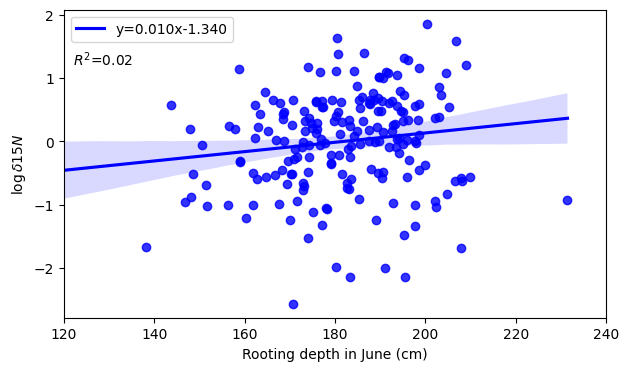

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log  \delta 15N$')
plt.text(122, 1.2, "$R^2$="+str(round(r_value**2,2)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.xlim((120, 240))
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [197]:
import seaborn as sns
import statsmodels.api as sm


# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Log_Delta_15N"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Delta_15N   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.370
Date:                Wed, 21 Jun 2023   Prob (F-statistic):             0.0379
Time:                        17:32:46   Log-Likelihood:                -231.39
No. Observations:                 200   AIC:                             466.8
Df Residuals:                     198   BIC:                             473.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

0.0012131695463795597 -0.22044461366328838 0.051157552881233165 0.4718861789094224


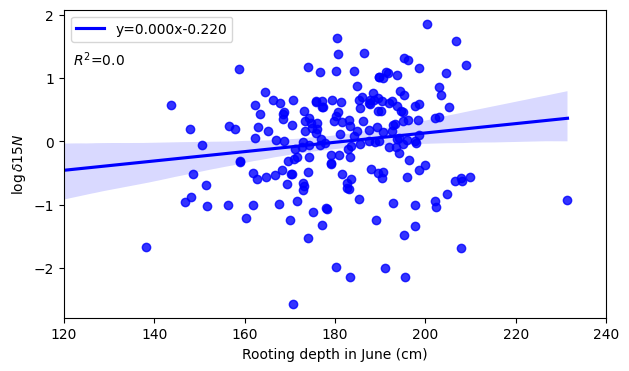

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log  \delta 15N$')
plt.text(122, 1.2, "$R^2$="+str(round(r_value**2,2)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.xlim((120, 240))
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

In [199]:
import seaborn as sns
import statsmodels.api as sm

# Fit a linear regression model using statsmodels
X = sm.add_constant(DF_SR['June_Inflection_sig_point'])
y = DF_SR["Delta_13C"]
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Delta_13C   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Wed, 21 Jun 2023   Prob (F-statistic):              0.472
Time:                        17:33:17   Log-Likelihood:                -83.523
No. Observations:                 200   AIC:                             171.0
Df Residuals:                     198   BIC:                             177.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 